In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [15]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percent: float


In [24]:
def calculate_sr(state: BatsmanState) -> BatsmanState:
    sr = (state['runs'] / state['balls']) * 100
    return {'sr': sr}


In [25]:
def calculate_brb(state: BatsmanState) -> BatsmanState:
    bpb = state['balls'] / state['runs'] if state['runs'] > 0 else 0
    return {'bpb': bpb}

In [26]:
def calculate_boundary_percent(state: BatsmanState) -> BatsmanState:
    total_boundaries = state['fours'] + state['sixes']
    boundary_percent = (total_boundaries / state['balls']) * 100 if state['balls'] > 0 else 0
    return {'boundary_percent': boundary_percent}



In [27]:
def generate_summary(state: BatsmanState) -> str:
    summary = (
        f"Runs: {state['runs']}, Balls: {state['balls']}, Fours: {state['fours']}, Sixes: {state['sixes']}\n"
        f"Strike Rate: {state['sr']:.2f}, Balls per Run: {state['bpb']:.2f}, Boundary Percentage: {state['boundary_percent']:.2f}%"
    )
    return {'summary': summary}

In [28]:
graph = StateGraph(BatsmanState)
graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_brb", calculate_brb)
graph.add_node("calculate_boundary_percent", calculate_boundary_percent)
graph.add_node("summary", generate_summary)

graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_brb")
graph.add_edge(START, "calculate_boundary_percent")
graph.add_edge("calculate_sr", "summary")
graph.add_edge("calculate_brb", "summary")
graph.add_edge("calculate_boundary_percent", "summary")
graph.add_edge("summary", END)



In [29]:
workflow = graph.compile()

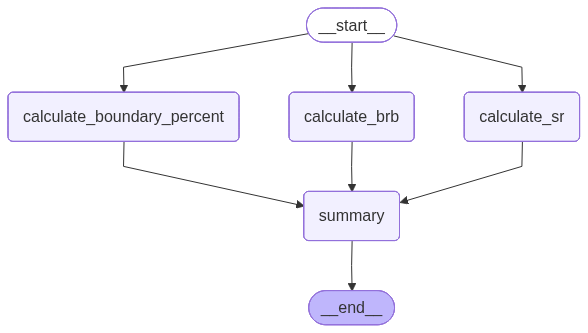

In [30]:
workflow

In [31]:
initial_state = {
    "runs": 100,
    "balls": 80,
    "fours": 10,
    "sixes": 5
}

workflow.invoke(initial_state)

{'runs': 100,
 'balls': 80,
 'fours': 10,
 'sixes': 5,
 'sr': 125.0,
 'bpb': 0.8,
 'boundary_percent': 18.75}